# **1. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning.

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

from sklearn.metrics import accuracy_score, confusion_matrix, f1_score, precision_score, recall_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix

# **2. Memuat Dataset dari Hasil Clustering**

Memuat dataset hasil clustering dari file CSV ke dalam variabel DataFrame.

In [2]:
file = "dataset/customer_shopping_clustered.csv"
df = pd.read_csv(file)
df.head()

,invoice_no,customer_id,gender,age,category,quantity,price,payment_method,invoice_date,shopping_mall,cluster
0,I138884,C241288,Female,28,Clothing,5,1500.40,Credit Card,2022-08-05,Kanyon,1
1,I317333,C111565,Male,21,Shoes,3,1800.51,Debit Card,2021-12-12,Forum Istanbul,0
2,I127801,C266599,Male,20,Clothing,1,300.08,Cash,2021-11-09,Metrocity,1
3,I173702,C988172,Female,66,Shoes,5,3000.85,Credit Card,2021-05-16,Metropol AVM,0
4,I337046,C189076,Female,53,Books,4,60.60,Cash,2021-10-24,Kanyon,0


In [3]:
df.shape

(99457, 11)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99457 entries, 0 to 99456
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   invoice_no      99457 non-null  object 
 1   customer_id     99457 non-null  object 
 2   gender          99457 non-null  object 
 3   age             99457 non-null  int64  
 4   category        99457 non-null  object 
 5   quantity        99457 non-null  int64  
 6   price           99457 non-null  float64
 7   payment_method  99457 non-null  object 
 8   invoice_date    99457 non-null  object 
 9   shopping_mall   99457 non-null  object 
 10  cluster         99457 non-null  int64  
dtypes: float64(1), int64(3), object(7)
memory usage: 8.3+ MB


In [5]:
df_encoded = df.copy()

# Convert 'invoice_date' to datetime
df_encoded['invoice_date'] = pd.to_datetime(df_encoded['invoice_date'], format='%Y-%m-%d')

# Frequency Encoding for 'payment_method', 'category', and 'shopping_mall'
def frequency_encoding(series):
    freq = series.value_counts()
    return series.map(freq)

df_encoded['gender'] = frequency_encoding(df_encoded['gender'])
df_encoded['category'] = frequency_encoding(df_encoded['category'])
df_encoded['payment_method'] = frequency_encoding(df_encoded['payment_method'])
df_encoded['shopping_mall'] = frequency_encoding(df_encoded['shopping_mall'])

print("Encoded DataFrame:")
df_encoded.head()


Encoded DataFrame:


,invoice_no,customer_id,gender,age,category,quantity,price,payment_method,invoice_date,shopping_mall,cluster
0,I138884,C241288,59482,28,34487,5,1500.40,34931,2022-08-05,19823,1
1,I317333,C111565,39975,21,10034,3,1800.51,20079,2021-12-12,4947,0
2,I127801,C266599,39975,20,34487,1,300.08,44447,2021-11-09,15011,1
3,I173702,C988172,59482,66,10034,5,3000.85,34931,2021-05-16,10161,0
4,I337046,C189076,59482,53,4981,4,60.60,44447,2021-10-24,19823,0


In [6]:
df_encoded.describe(include='object')

,invoice_no,customer_id
count,99457,99457
unique,99457,99457
top,I232867,C273973
freq,1,1


In [7]:
df_encoded.describe(include='number')

,gender,age,category,quantity,price,payment_method,shopping_mall,cluster
count,99457.000000,99457.000000,99457.000000,99457.000000,99457.000000,99457.000000,99457.000000,99457.000000
mean,51641.502850,43.427089,19232.350232,3.003429,689.256321,36185.254039,13446.516716,0.346753
std,9564.104875,14.990054,11566.865169,1.413025,941.184567,9133.921989,6109.196525,0.475939
min,39975.000000,18.000000,4981.000000,1.000000,5.230000,20079.000000,4811.000000,0.000000
25%,39975.000000,30.000000,10034.000000,2.000000,45.450000,34931.000000,9781.000000,0.000000
50%,59482.000000,43.000000,14776.000000,3.000000,203.300000,34931.000000,15011.000000,0.000000
75%,59482.000000,56.000000,34487.000000,4.000000,1200.320000,44447.000000,19823.000000,1.000000
max,59482.000000,69.000000,34487.000000,5.000000,5250.000000,44447.000000,19943.000000,1.000000


# **3. Data Splitting**

Tahap Data Splitting bertujuan untuk memisahkan dataset menjadi dua bagian: data latih (training set) dan data uji (test set).

In [8]:
X = df_encoded.drop(columns=['invoice_no', 'customer_id', 'cluster', 'invoice_date'])  # Features
y = df_encoded['cluster']  # Target

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)
print(f"Training set: {X_train.shape}, Test set: {X_test.shape}")

Training set: (69619, 7), Test set: (29838, 7)


# **4. Membangun Model Klasifikasi**


## **a. Membangun Model Klasifikasi**

Setelah memilih algoritma klasifikasi yang sesuai, langkah selanjutnya adalah melatih model menggunakan data latih.

Berikut adalah rekomendasi tahapannya.
1. Pilih algoritma klasifikasi yang sesuai, seperti Logistic Regression, Decision Tree, Random Forest, atau K-Nearest Neighbors (KNN).
2. Latih model menggunakan data latih.

### Logistic Regression & Decision Tree

In [9]:
logreg = LogisticRegression(max_iter=1000, random_state=42)
logreg.fit(X_train, y_train)

dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)

# Predict and evaluate Logistic Regression
y_pred_logreg = logreg.predict(X_test)

# Predict and evaluate Decision Tree
y_pred_dt = dt.predict(X_test)

Tulis narasi atau penjelasan algoritma yang Anda gunakan.

## **b. Evaluasi Model Klasifikasi**

Berikut adalah **rekomendasi** tahapannya.
1. Lakukan prediksi menggunakan data uji.
2. Hitung metrik evaluasi seperti Accuracy dan F1-Score (Opsional: Precision dan Recall).
3. Buat confusion matrix untuk melihat detail prediksi benar dan salah.

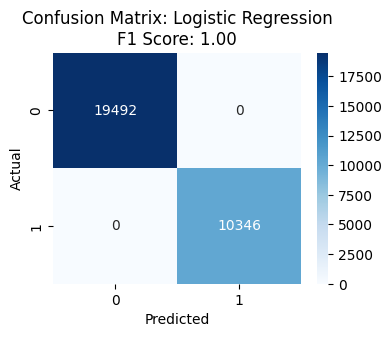

In [10]:
# Calculate metrics for Logistic Regression
accuracy_logreg = accuracy_score(y_test, y_pred_logreg)
precision_logreg = precision_score(y_test, y_pred_logreg, average='weighted')
recall_logreg = recall_score(y_test, y_pred_logreg, average='weighted')
f1_logreg = f1_score(y_test, y_pred_logreg, average='weighted')

# Confusion matrix for Logistic Regression with F1 score in the title
f1_logreg = f1_score(y_test, y_pred_logreg, average='weighted')

plt.figure(figsize=(4, 3))
sns.heatmap(confusion_matrix(y_test, y_pred_logreg), annot=True, fmt='d', cmap='Blues')
plt.title(f"Confusion Matrix: Logistic Regression\nF1 Score: {f1_logreg:.2f}")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

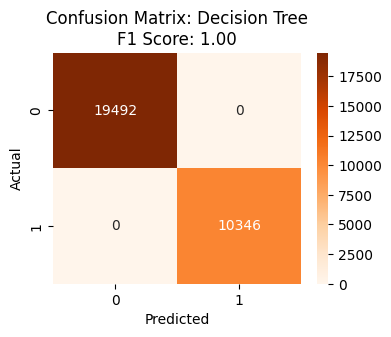

In [11]:
# Calculate metrics for Decision Tree
accuracy_dt = accuracy_score(y_test, y_pred_dt)
precision_dt = precision_score(y_test, y_pred_dt, average='weighted')
recall_dt = recall_score(y_test, y_pred_dt, average='weighted')
f1_dt = f1_score(y_test, y_pred_dt, average='weighted')

# Confusion matrix for Decision Tree with F1 score in the title
f1_dt = f1_score(y_test, y_pred_dt, average='weighted')

plt.figure(figsize=(4, 3))
sns.heatmap(confusion_matrix(y_test, y_pred_dt), annot=True, fmt='d', cmap='Oranges')
plt.title(f"Confusion Matrix: Decision Tree\nF1 Score: {f1_dt:.2f}")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


In [16]:
# Create a DataFrame to summarize the metrics
metrics_table = pd.DataFrame({
    "Algorithm": ["Logistic Regression", "Decision Tree"],
    "Accuracy": [accuracy_logreg, accuracy_dt],
    "Precision": [precision_logreg, precision_dt],
    "Recall": [recall_logreg, recall_dt],
    "F1 Score": [f1_logreg, f1_dt]
})

# Display the table
print(metrics_table)

             Algorithm  Accuracy  Precision  Recall  F1 Score
0  Logistic Regression       1.0        1.0     1.0       1.0
1        Decision Tree       1.0        1.0     1.0       1.0


- Kedua algoritma mencapai performa sempurna dengan F1 Score 1.0, Akurasi 1.0, Precision 1.0, dan Recall 1.0. Artinya, kedua model yang dibangun dengan logistic regression & decision tree berhasil memprediksi seluruh target variabel dengan tepat tanpa kesalahan.

## **c. Tuning Model Klasifikasi (Optional)**

Gunakan GridSearchCV, RandomizedSearchCV, atau metode lainnya untuk mencari kombinasi hyperparameter terbaik

In [13]:
# Tidak perlu

## **d. Evaluasi Model Klasifikasi setelah Tuning (Optional)**

Berikut adalah rekomendasi tahapannya.
1. Gunakan model dengan hyperparameter terbaik.
2. Hitung ulang metrik evaluasi untuk melihat apakah ada peningkatan performa.

In [14]:
# Tidak perlu

## **e. Analisis Hasil Evaluasi Model Klasifikasi**

Berikut adalah **rekomendasi** tahapannya.
1. Bandingkan hasil evaluasi sebelum dan setelah tuning (jika dilakukan).
2. Identifikasi kelemahan model, seperti:
  - Precision atau Recall rendah untuk kelas tertentu.
  - Apakah model mengalami overfitting atau underfitting?
3. Berikan rekomendasi tindakan lanjutan, seperti mengumpulkan data tambahan atau mencoba algoritma lain jika hasil belum memuaskan.

Hasil clustering yang digunakan sebagai data latih memang bersifat univariate clustering yang hanya mempertimbangkan satu fitur yaitu 'category'. Karena sangat sederhana, wajar saja kedua algoritma yang digunakan disini dapat mencapai performa sempurna dalam melakukan klasifikasi.

**Rekomendasi yang dapat diberikan adalah mengganti kriteria penggunaan silhouette score sebagai metrik evaluasi clustering yang hasilnya digunakan untuk melatih model klasifikasi ketika memang harus memilih mixed feature. Memberikan intruksi untuk memilih mixed feature dengan argumen 'Kombinasi data kategorik dan numerik ini akan membantu menghasilkan pengelompokkan cluster yang lebih bermakna' juga kurang tepat karena hal ini sanget tergantung pada dataset yang digunakan dan konteks permasalahan bisnis yang ingin diselesaikan.**